## WordCloud

In [1]:
import pandas as pd
import re # 특문제거 정규식
from operator import itemgetter # 빈도집계
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
from konlpy.tag import Okt
okt = Okt()

#### 워드클라우드 디스플레이 옵션

In [3]:
# 불용어 사전을 지정하면 해당 단어는 제외하고 워드클라우드를 그립니다.
# 다른 단어들을 좀 더 자세히 표현하고자 아래 텍스트를 제거하고 그립니다.
# STOPWORDS = ["정부", "혁신", "문제점", "사업", "현황", "조직", "축사", "방법", "미만", "내용", "각종", "신설", "필요시"]
STOPWORDS = ['더', '부분', '학교', '옷', '좀', '진행', '의견', '년', '달', '안함', '경우', '함', '복', '때']

def displayWordCloud(data=None, backgroundcolor='white', width=1600, height=800):
    # word_max = 30 # 최대단어 갯수
    wordcloud = WordCloud(
        font_path = 'C:/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc',
        stopwords = STOPWORDS, # 불용어
        background_color = backgroundcolor,
        # max_words = word_max,
        prefer_horizontal = 1, #글자 수평
        width = width,
        height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

#### 문자열 전처리 함수

In [4]:
def preprocessing(text: str) -> str:
    # 양쪽끝 공백제거
    text = text.strip()
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    
    text = re.sub('[?;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text) # ., 제외
    
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    # 한글만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ]', ' ', text)
    # 중복으로 생성된 공백값을 제거합니다.
    text = re.sub('[\s]+', ' ', text)
    # 영문자를 소문자로 만듭니다.
    # text = text.lower()
    return text

In [5]:
# 정규표현식 확인
text = "     전처리가 잘~~~\---되는지 (확인) 합니다.-- 공    백도 확인하고 숫자0-9도 확인 합니다. EnglisH는 모두 소문자로 만듭니다.     "
preprocessing(text)

'전처리가 잘\\되는지 확인 합니다 공 백도 확인하고 숫자도 확인 합니다 EnglisH는 모두 소문자로 만듭니다'

#### 데이터 불러오기

In [6]:
df = pd.read_excel('./22NSPD.xlsx')
df.head()

,ins_id,ins_no,agent,agen_name,rem4
0,22ND,01.02,VG013,제천점,없습니다
1,22ND,02.02,VG013,제천점,없습니다
2,22ND,03.01,VG013,제천점,없습니다
3,22ND,04.04,VG013,제천점,없습니다
4,22ND,05.01,VG013,제천점,없습니다


In [7]:
# map을 통해 전처리 일괄 적용
df['rem4'] = df['rem4'].map(preprocessing)

In [8]:
# okt 로 명사만 추출합니다.
# %time okt_content_nouns = okt.nouns(' '.join(df['rem4']).replace('_x000D_', '').replace('xDxD', ''))
# len(okt_content_nouns)

In [9]:
# 빈도수 카운트
def word_count_to_dict(words: list) -> dict:
    word_cnt = {} # 사전을 만든다
    for word in words: # 모든 단어에 대해서
        if word in word_cnt: # 사전에 단어가 있으면
            word_cnt[word] += 1 # 단어의 개수를 1 증가 시킨다
        else: # 없으면
            word_cnt[word] = 1 # 단어의 개수를 1로 한다\
    
    return word_cnt


# 최종집계 함수
def okt_nouns_wordcloud(season: str, df: pd.DataFrame):
    okt_content_nouns = okt.nouns(' '.join(df[df['ins_id']==season]['rem4']).replace('_x000D_', '').replace('xDxD', ''))
    displayWordCloud(' '.join(okt_content_nouns))
    
    if season[-1] == 'D':
        gbn = '디자인 선호도 조사'
    else:
        gbn = '유통품질 만족도 조사'
    
    # 빈도수 카운트
    word_count = word_count_to_dict(okt_content_nouns)
    for stwd in STOPWORDS: # 불용어 빼버리기
        if stwd in word_count:
            word_count.pop(stwd)
        else:
            pass
    
    sorted_words = sorted(word_count.items(), key=itemgetter(1), reverse=True) # 집계
    
    print(f'시즌 : {season[:3]}')
    print(f'설문조사구분: {gbn}')
    print()
    print(f'< 총 {len(okt_content_nouns)}개 단어 중 상위빈도 20개 단어 >')
    for i, wd in enumerate(sorted_words):
        if i < 20:
            print(f"{i+1}위 '{wd[0]}' : {wd[1]}회")
        else:
            break

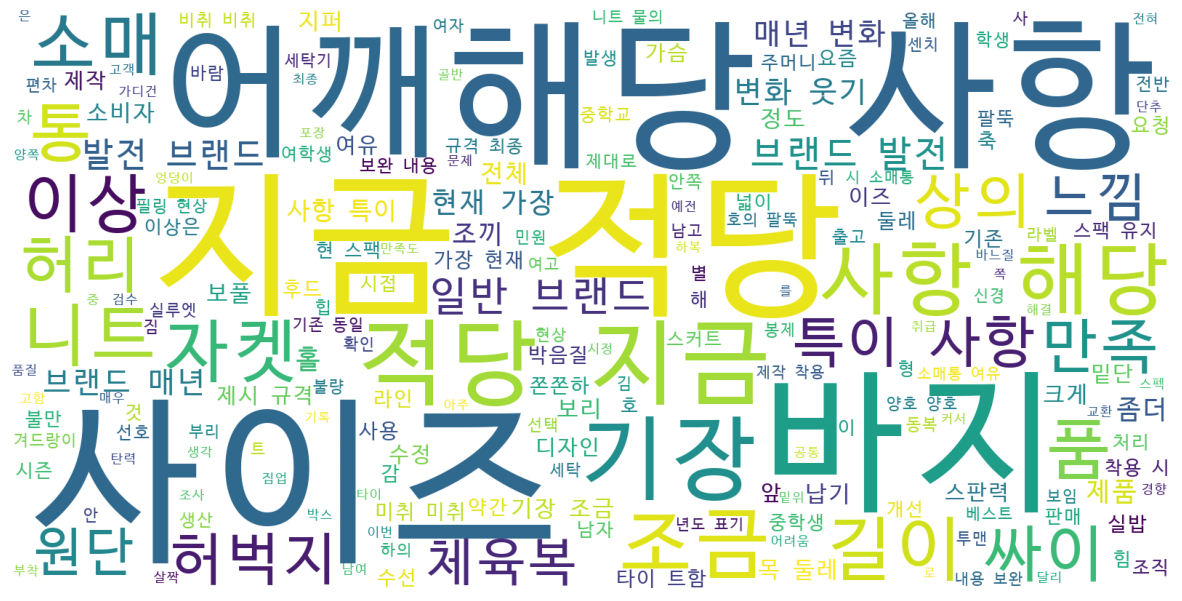

시즌 : 22N
설문조사구분: 디자인 선호도 조사

< 총 2751개 단어 중 상위빈도 20개 단어 >
1위 '해당' : 60회
2위 '사항' : 56회
3위 '지금' : 47회
4위 '사이즈' : 47회
5위 '적당' : 38회
6위 '기장' : 37회
7위 '조금' : 36회
8위 '바지' : 34회
9위 '브랜드' : 31회
10위 '어깨' : 30회
11위 '니트' : 25회
12위 '길이' : 22회
13위 '소매' : 21회
14위 '자켓' : 21회
15위 '현재' : 20회
16위 '품' : 20회
17위 '통' : 18회
18위 '이상' : 18회
19위 '허리' : 17회
20위 '싸이' : 17회


In [10]:
okt_nouns_wordcloud('22ND', df)

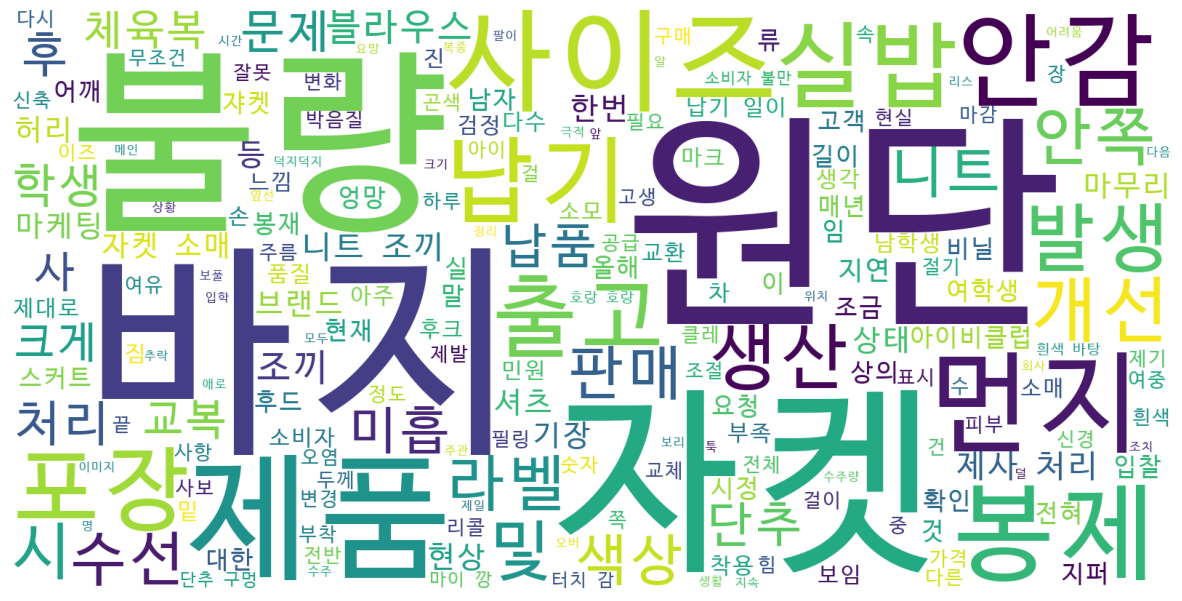

시즌 : 22N
설문조사구분: 유통품질 만족도 조사

< 총 1944개 단어 중 상위빈도 20개 단어 >
1위 '원단' : 39회
2위 '바지' : 38회
3위 '자켓' : 35회
4위 '불량' : 28회
5위 '제품' : 23회
6위 '사이즈' : 23회
7위 '먼지' : 22회
8위 '납기' : 20회
9위 '봉제' : 20회
10위 '안감' : 19회
11위 '니트' : 17회
12위 '실밥' : 16회
13위 '처리' : 16회
14위 '포장' : 15회
15위 '출고' : 15회
16위 '발생' : 14회
17위 '조끼' : 14회
18위 '생산' : 13회
19위 '개선' : 13회
20위 '단추' : 12회


In [11]:
okt_nouns_wordcloud('22NP', df)

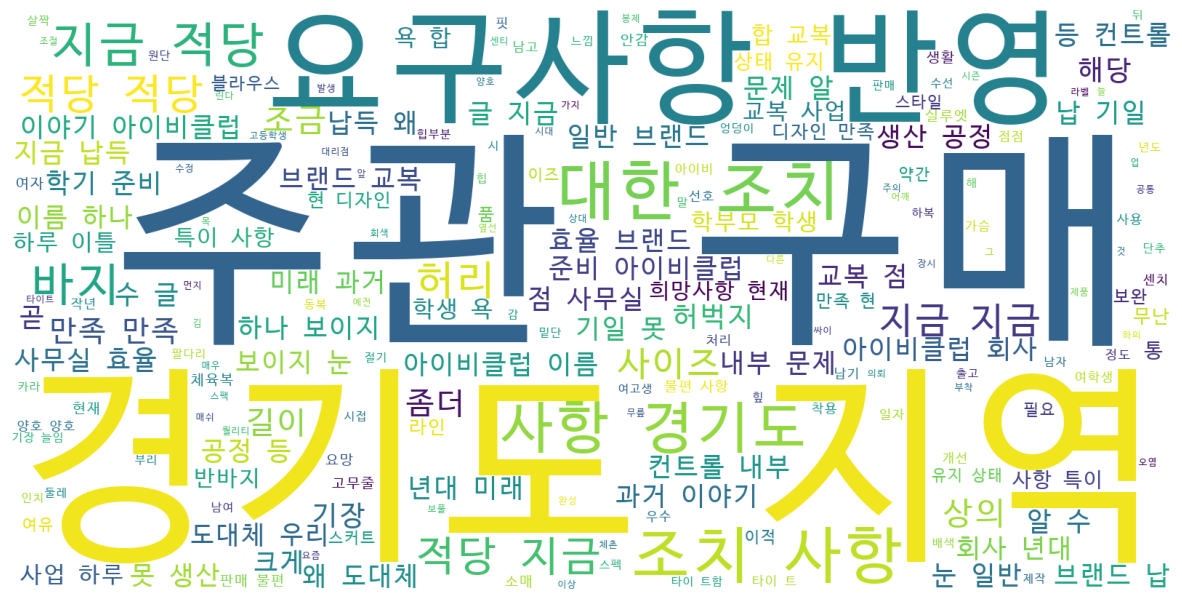

시즌 : 22S
설문조사구분: 디자인 선호도 조사

< 총 2583개 단어 중 상위빈도 20개 단어 >
1위 '지금' : 98회
2위 '적당' : 86회
3위 '사항' : 79회
4위 '주관' : 61회
5위 '구매' : 60회
6위 '경기도' : 59회
7위 '지역' : 59회
8위 '요구사항' : 59회
9위 '반영' : 59회
10위 '대한' : 59회
11위 '조치' : 59회
12위 '바지' : 34회
13위 '만족' : 28회
14위 '허리' : 27회
15위 '교복' : 24회
16위 '아이비클럽' : 22회
17위 '브랜드' : 22회
18위 '사이즈' : 19회
19위 '조금' : 17회
20위 '학생' : 17회


In [12]:
okt_nouns_wordcloud('22SD', df)

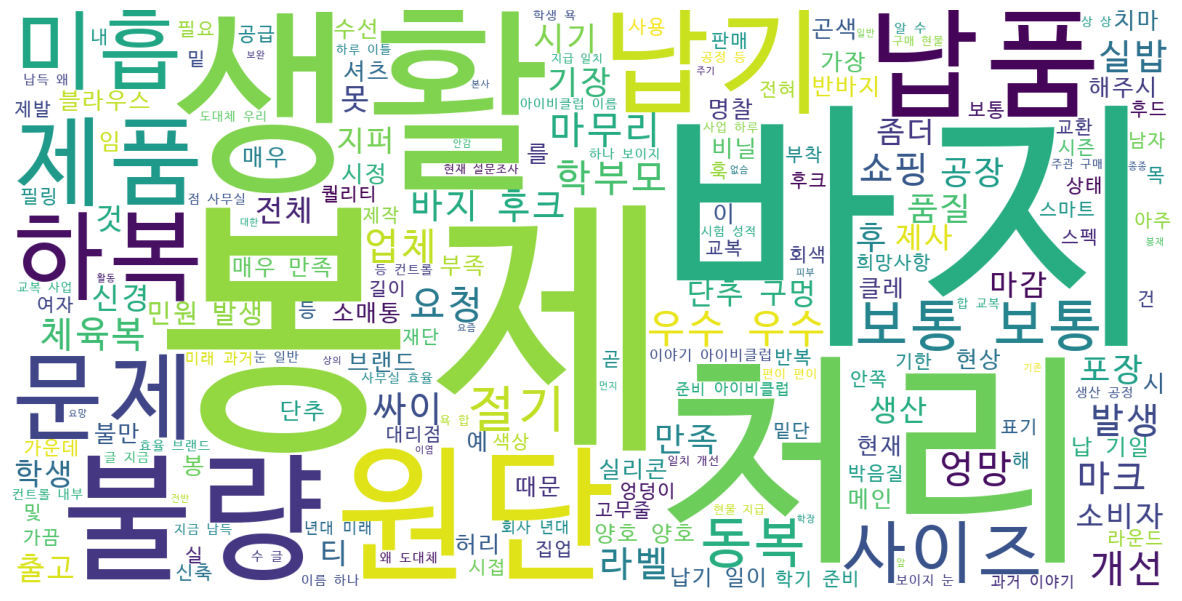

시즌 : 22S
설문조사구분: 유통품질 만족도 조사

< 총 1635개 단어 중 상위빈도 20개 단어 >
1위 '바지' : 38회
2위 '봉제' : 32회
3위 '보통' : 25회
4위 '처리' : 22회
5위 '생활' : 20회
6위 '원단' : 20회
7위 '납기' : 18회
8위 '불량' : 17회
9위 '우수' : 16회
10위 '납품' : 15회
11위 '제품' : 12회
12위 '하복' : 12회
13위 '발생' : 12회
14위 '문제' : 12회
15위 '개선' : 11회
16위 '미흡' : 11회
17위 '사이즈' : 11회
18위 '만족' : 10회
19위 '후크' : 10회
20위 '동복' : 10회


In [13]:
okt_nouns_wordcloud('22SP', df)